# Bank Marketing Analysis

In [1]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
# Reading the dataset
bm = pd.read_csv("bank-marketing.csv")
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [4]:
bm.shape

(45211, 19)

In [5]:
bm.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bm["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [7]:
print("Mean value of pdays columns : ",bm["pdays"].mean())
print("Median value of pdays columns : ",bm["pdays"].median())
print("Minimum value of pdays columns : ",bm["pdays"].min())

Mean value of pdays columns :  40.19782796222158
Median value of pdays columns :  -1.0
Minimum value of pdays columns :  -1


#### pdays means number of days the customer was contacted after the last campaign and days cannot be -1.


#### Now we are limiting the pdays to relevant values and calculating mean and median

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. 

In [8]:
print("Mean of pdays column of relevant values :", bm[bm["pdays"] != -1]["pdays"].mean())
print("Median of pdays column of relevant values :", bm[bm["pdays"] != -1]["pdays"].median())

Mean of pdays column of relevant values : 224.57769165556496
Median of pdays column of relevant values : 194.0


#### Mean removing irrelevant values 40.19 and after removing irrelevant values it is 224.577
#### Median before was -1 after limiting it to relevant values it is 194

### Plotting a horizontal bar graph with the median values of balance for each education level value. 

In [9]:
bm["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Grouping education based on balance')

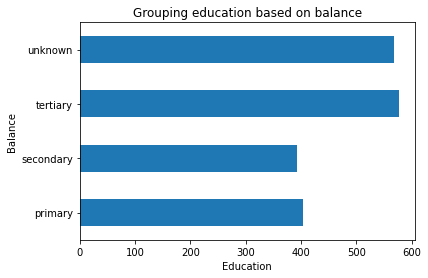

In [10]:
bm.groupby("education")["balance"].median().plot.barh()
plt.xlabel("Education")
plt.ylabel("Balance")
plt.title("Grouping education based on balance")

#### Tertiary group of education has highest median balance

### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:ylabel='pdays'>

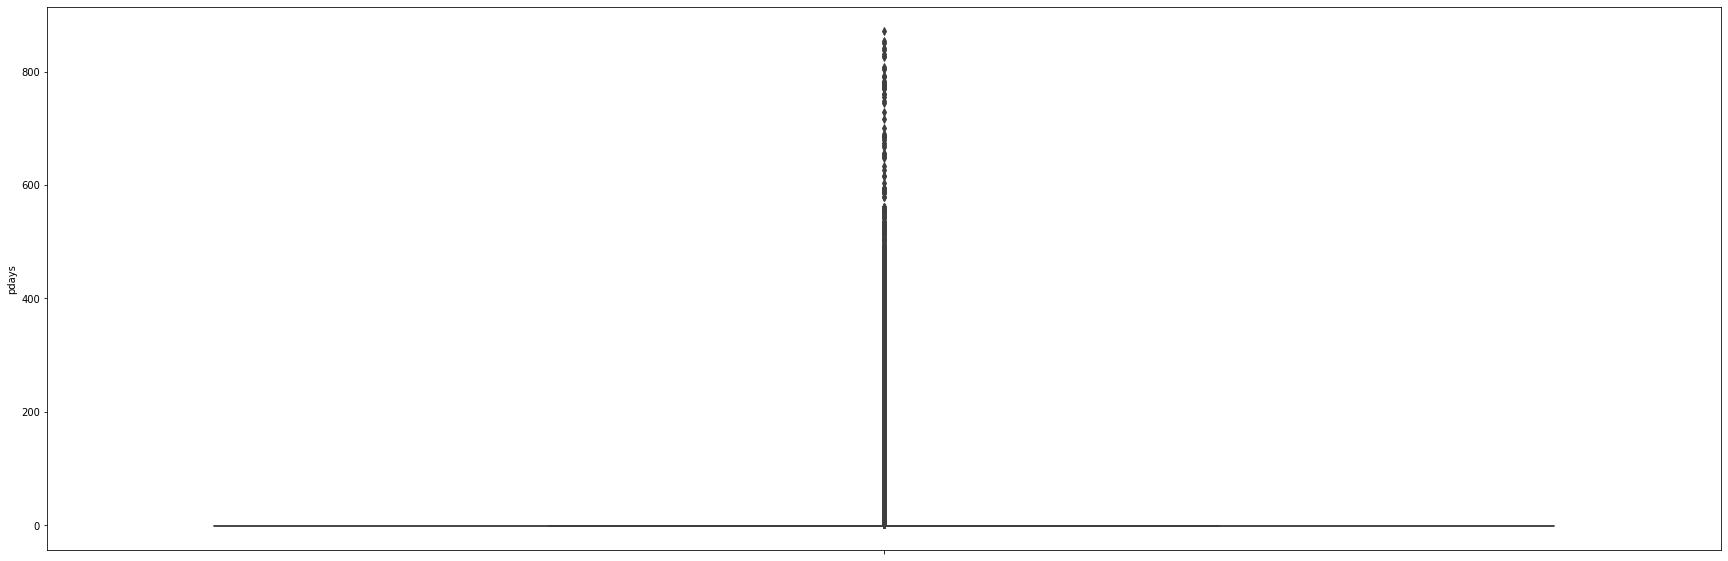

In [11]:
# Boxplot for pdays
plt.figure(figsize = (30,10))
sns.boxplot(y=bm["pdays"])

#### Yes, there are so many outliers

In [12]:
categorical_feature = [feature for feature in bm.columns if bm[feature].dtypes == "O"]
categorical_feature

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

### Exploratory Data Analysis

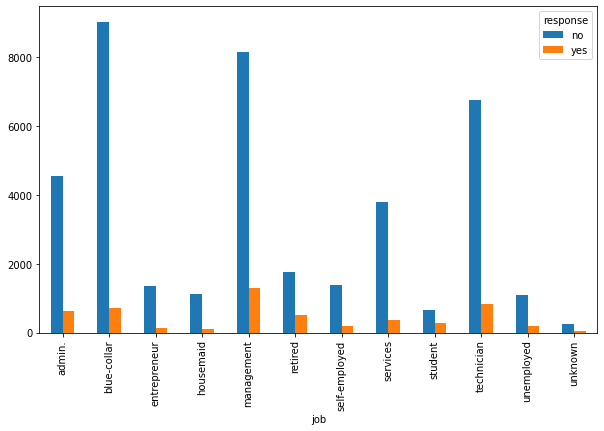

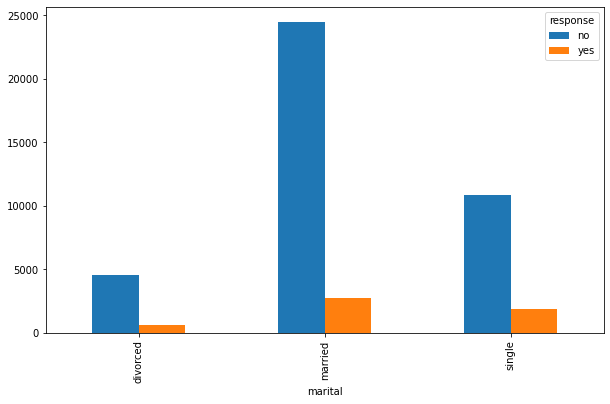

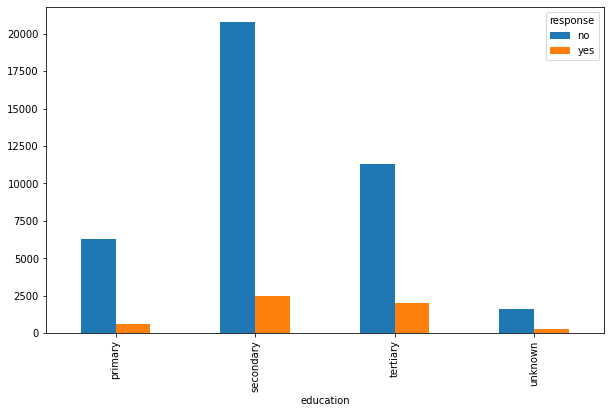

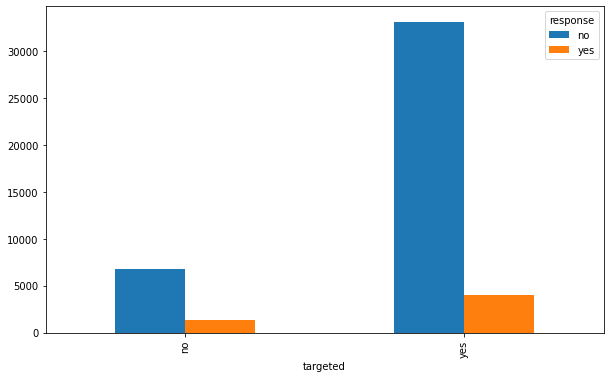

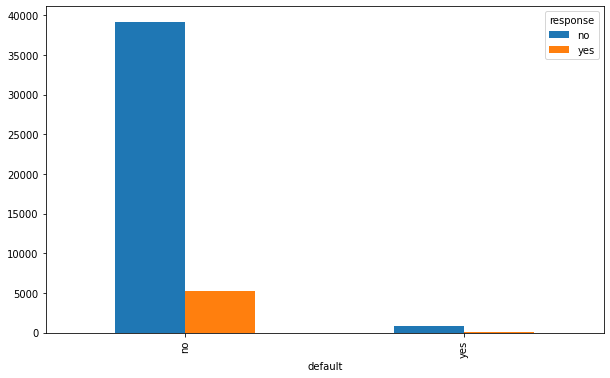

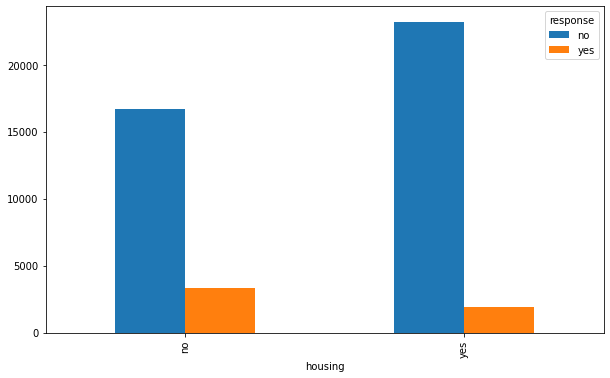

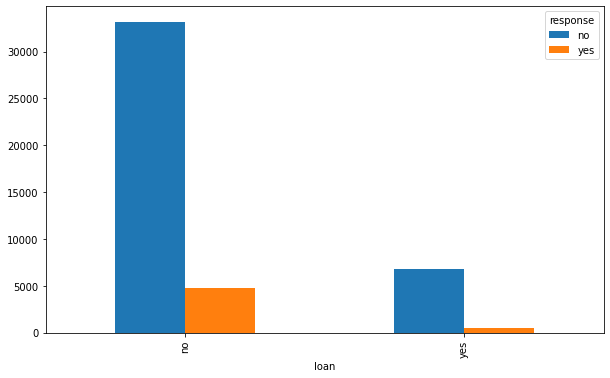

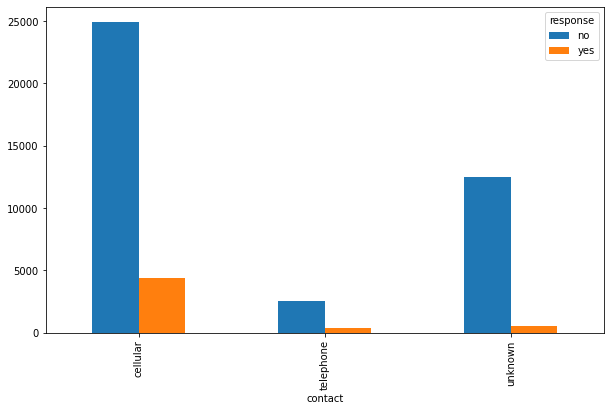

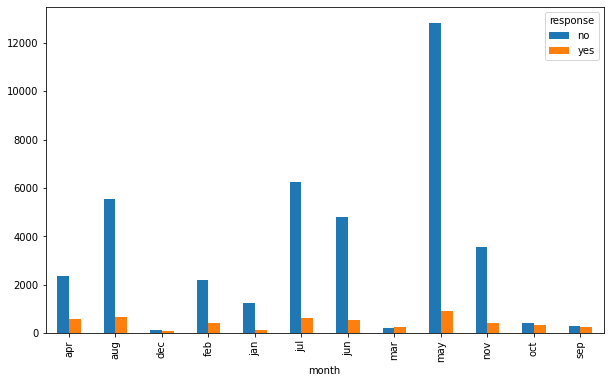

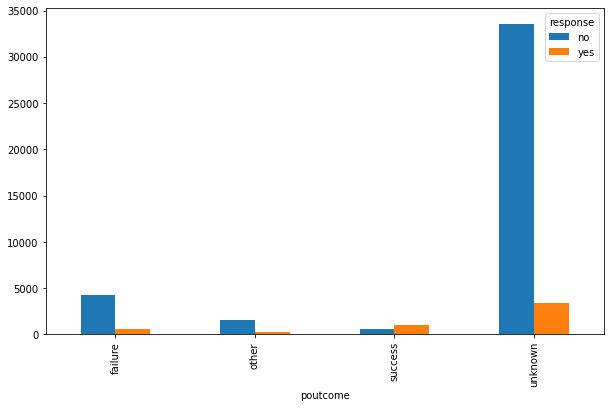

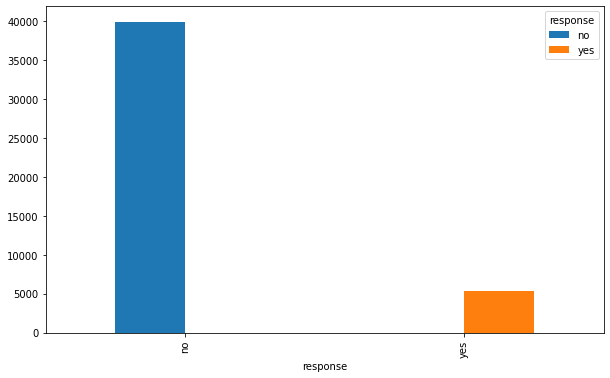

In [13]:
## Bi-variate Analysis

for feature in categorical_feature :
    pd.crosstab(bm[feature],bm["response"]).plot.bar(figsize=(10,6))

In [14]:
numerical_feature = [feature for feature in bm.columns if bm[feature].dtypes != "O"]
numerical_feature

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


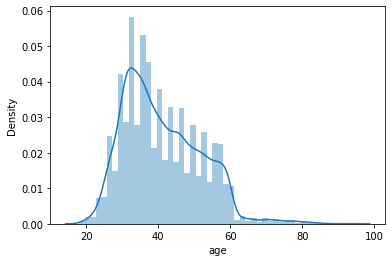

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


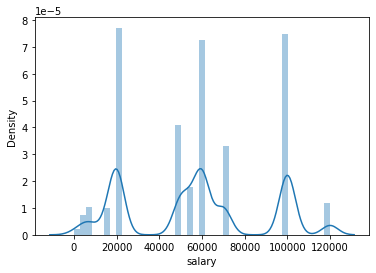

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


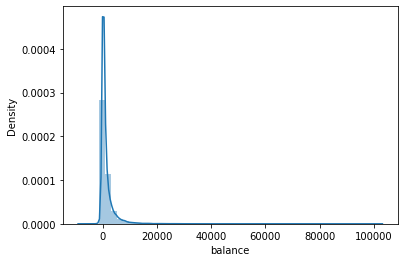

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


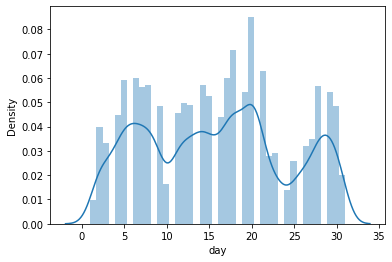

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


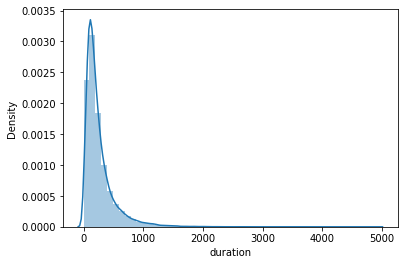

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


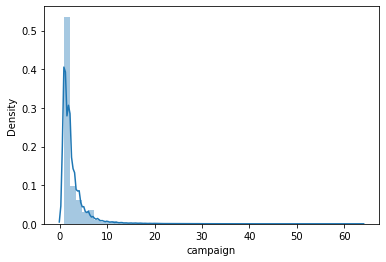

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


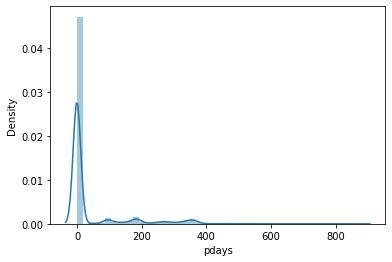

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


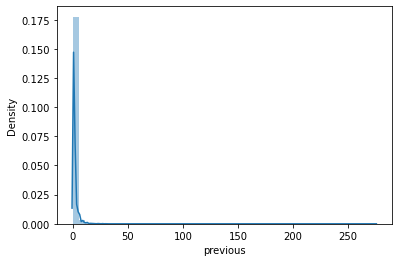

In [15]:
### Uni-variate Analysis of Numerical variable

for feature in numerical_feature :
    sns.distplot(bm[feature])
    plt.show()

In [16]:
# Converting the response column into convenient form 

bm["response"] = np.where(bm["response"]=="yes",1,0)
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [17]:
# Correlation

bm_corr=bm.corr()
bm_corr

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

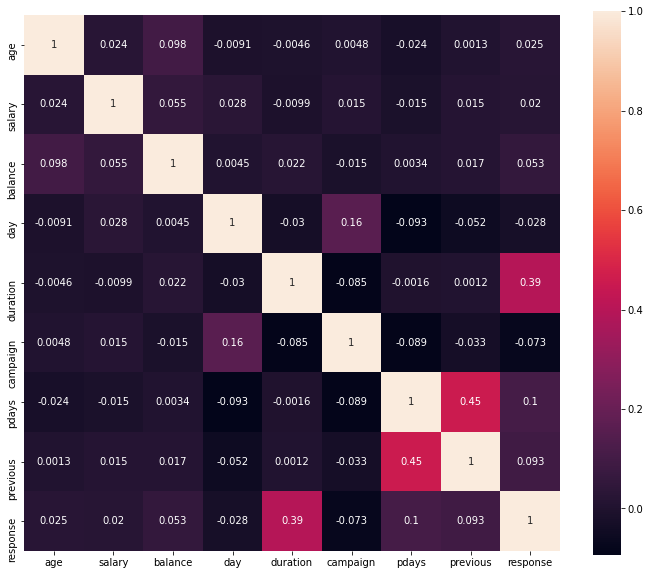

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(bm_corr,square=True,annot=True)

### As we can observe that there is no major correlation between all the columns and the highest correlated columns are pdays and previous with value of 0.45

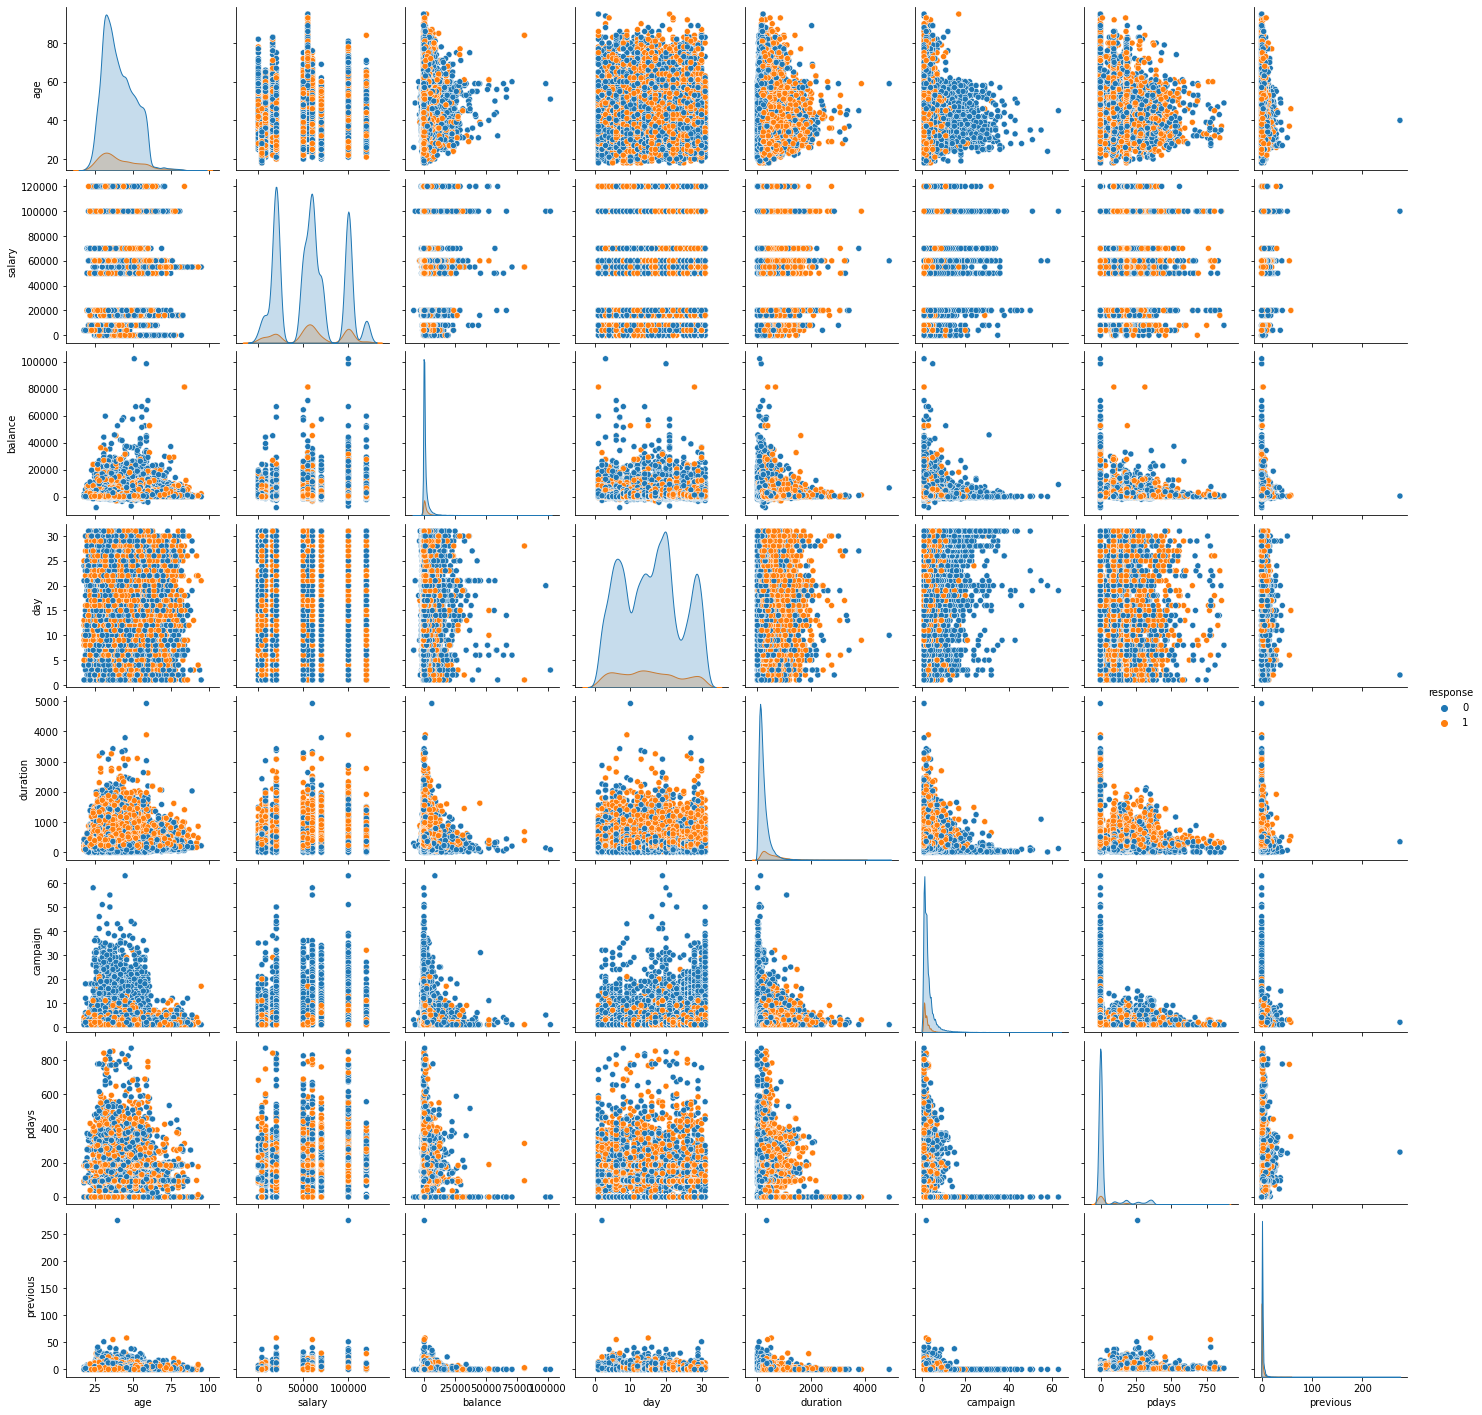

In [19]:
# Checking whether pdays and poutcomes are related to response
sns.pairplot(bm,hue="response")

### Are the features about the previous campaign data useful?

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

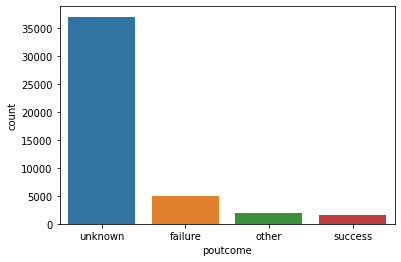

In [20]:
sns.countplot(bm["poutcome"])

#### Feature of previous campaining data isn't useful as majority of the result is unknown

In [21]:
# Dropping poutcome column 
bm.drop("poutcome",axis=1,inplace=True)

In [22]:
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0


In [23]:
bm["pdays"].value_counts().head()

-1      36954
 182      167
 92       147
 91       126
 183      126
Name: pdays, dtype: int64

#### Handling the -1 value in pdays 
#### As number of days cannot be negative so we will convert pdays into categorical feature where -1 value will be converted to 1 meaning they aren't contacted whereas positive numbers will be converted to zero indicating they were contacted 

In [24]:
bm["pdays_no_contact"] = np.where(bm["pdays"]==-1,1,0)
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [25]:
bm["pdays_no_contact"].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

### Handling outliers 

In [26]:
### As we can see the graph of age we can assume it to be gaussian distribution 
### So we will calculate boundaries which will differentiate outliers

upper_boundary = bm["age"].mean() + 3*bm["age"].std()
lower_boundary = bm["age"].mean() - 3*bm["age"].std()
print(upper_boundary), print(lower_boundary), print(bm["age"].mean())

72.79249633725463
9.079924091402106
40.93621021432837


(None, None, None)

In [27]:
index = bm[ (bm["age"] > upper_boundary) | (bm["age"] < lower_boundary) ].index
bm.drop(index,axis=0,inplace=True)

In [28]:
bm[(bm["age"]>upper_boundary) | (bm["age"]<lower_boundary)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [29]:
# Assuming balance to gaussian distribution 
# So removing outliers
bm["balance"].describe()

count     44830.000000
mean       1349.281553
std        2987.595690
min       -8019.000000
25%          71.000000
50%         444.000000
75%        1412.000000
max      102127.000000
Name: balance, dtype: float64

In [30]:
IQR = bm["balance"].quantile(0.75) - bm["balance"].quantile(0.25)
upper_limit = bm["balance"].quantile(0.75) + 3*IQR
lower_limit = bm["balance"].quantile(0.25) - 3*IQR
print(IQR),print(upper_limit),print(lower_limit)

1341.0
5435.0
-3952.0


(None, None, None)

In [31]:
bm[(bm["balance"]>upper_limit) | (bm["balance"]<lower_limit)].head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
34,51,management,100000,married,tertiary,yes,no,10635,yes,no,unknown,5,may,336,1,-1,0,0,1
65,51,management,100000,married,tertiary,yes,no,6530,yes,no,unknown,5,may,91,1,-1,0,0,1
69,35,blue-collar,20000,single,secondary,yes,no,12223,yes,yes,unknown,5,may,177,1,-1,0,0,1
70,57,blue-collar,20000,married,secondary,yes,no,5935,yes,yes,unknown,5,may,258,1,-1,0,0,1
205,50,services,70000,married,secondary,yes,no,5699,yes,no,unknown,5,may,381,2,-1,0,0,1


In [32]:
index = bm[(bm["balance"] > upper_limit) | (bm["balance"] < lower_limit)].index
bm.drop(index,axis=0,inplace=True)

In [33]:
bm[(bm["balance"] > upper_limit) | (bm["balance"] < lower_limit)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


<AxesSubplot:>

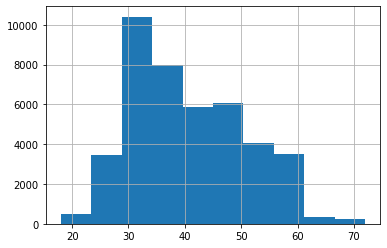

In [34]:
bm["age"].hist()

<AxesSubplot:>

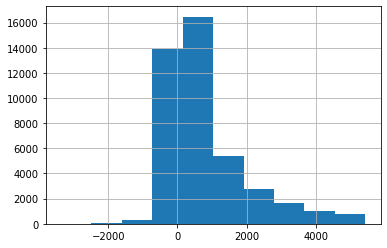

In [35]:
bm["balance"].hist()

In [36]:
bm["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [37]:
dictionary = {"jan" : 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" :10,
             "nov" : 11, "dec" : 12}

In [38]:
bm["month"] = bm["month"].map(dictionary)
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [39]:
bm1 = bm.copy()
bm1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


## Data Manipulation

In [40]:
bm1 = pd.get_dummies(bm1,drop_first = True)
bm1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,response,pdays_no_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,-1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,-1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


In [41]:
bm1.shape

(42397, 33)

In [42]:
bm1["pdays"].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: pdays, dtype: int64

In [43]:
bm1["pdays"].value_counts().head()

-1      34785
 182      146
 92       129
 91       115
 183      112
Name: pdays, dtype: int64

In [44]:
bm1.loc[bm1['pdays']==-1,'pdays']=0
bm1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

In [45]:
bm1["pdays"].value_counts().head()

0      34785
182      146
92       129
91       115
183      112
Name: pdays, dtype: int64

## Handling imbalanced dataset 

In [46]:
bm1["response"].value_counts()

0    37631
1     4766
Name: response, dtype: int64

<AxesSubplot:>

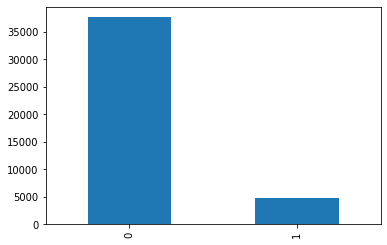

In [47]:
bm1["response"].value_counts().plot.bar()

#### As we can see the number of response "NO" is more than the "Yes" so it is an imbalanced data set 

In [48]:
# Separating independent and dependent variable 
X = bm1.drop("response",axis=1)
y = bm1["response"]

In [49]:

from imblearn.combine import SMOTETomek 

from collections import Counter 

In [50]:
os = SMOTETomek(1)
X_ns, y_ns = os.fit_resample(X,y)
print("Number of classes before fit {}".format(Counter(y)))
print("Number of classes after fit {}".format(Counter(y_ns)))

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Number of classes before fit Counter({0: 37631, 1: 4766})
Number of classes after fit Counter({0: 36471, 1: 36471})


In [51]:
y_ns.value_counts()

0    36471
1    36471
Name: response, dtype: int64

In [52]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


## Model buidling RFE

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit_transform(X_ns)

array([[ 1.72104936,  1.32109641,  0.9835832 , ..., -0.3335567 ,
        -0.19450646,  2.16117638],
       [ 0.36700142,  0.08379065, -0.74944371, ..., -0.3335567 ,
        -0.19450646,  2.16117638],
       [-0.69689338,  1.9397493 , -0.77157792, ...,  2.99799102,
        -0.19450646,  2.16117638],
       ...,
       [-0.01986942, -0.22553579, -0.44448344, ..., -0.3335567 ,
        -0.19450646, -0.46271096],
       [-0.69689338, -1.2772457 ,  0.90898271, ..., -0.3335567 ,
        -0.19450646, -0.46271096],
       [-0.40674025,  0.08379065,  1.77795552, ..., -0.3335567 ,
        -0.19450646, -0.46271096]])

In [55]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_ns),columns = X_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.721049,1.321096,0.983583,-1.313097,-0.429656,-0.340076,-0.526534,-0.49043,-0.333315,0.635865,-0.479463,-0.172973,-0.158293,1.876287,-0.238892,-0.150283,-0.306369,-0.192792,-0.427370,-0.187215,-0.077635,1.072041,-0.555803,-0.859285,1.664859,-0.159381,0.616558,-0.107153,1.227927,-0.333557,-0.194506,2.161176
1,0.367001,0.083791,-0.749444,-1.313097,-0.429656,-0.659008,-0.526534,-0.49043,-0.333315,0.635865,-0.479463,-0.172973,-0.158293,-0.532968,-0.238892,-0.150283,-0.306369,-0.192792,2.339893,-0.187215,-0.077635,-0.932800,1.799199,1.163759,-0.600651,-0.159381,0.616558,-0.107153,1.227927,-0.333557,-0.194506,2.161176
2,-0.696893,1.939749,-0.771578,-1.313097,-0.429656,-0.876462,-0.526534,-0.49043,-0.333315,0.635865,-0.479463,5.781249,-0.158293,-0.532968,-0.238892,-0.150283,-0.306369,-0.192792,-0.427370,-0.187215,-0.077635,1.072041,-0.555803,1.163759,-0.600651,-0.159381,0.616558,-0.107153,1.227927,2.997991,-0.194506,2.161176
3,0.657155,-1.153515,0.461380,-1.313097,-0.429656,-0.830072,-0.526534,-0.49043,-0.333315,0.635865,2.085667,-0.172973,-0.158293,-0.532968,-0.238892,-0.150283,-0.306369,-0.192792,-0.427370,-0.187215,-0.077635,1.072041,-0.555803,-0.859285,-0.600651,6.274261,-1.621907,-0.107153,1.227927,-0.333557,-0.194506,2.161176
4,-0.696893,-1.772168,-0.772398,-1.313097,-0.429656,-0.522737,-0.526534,-0.49043,-0.333315,0.635865,-0.479463,-0.172973,-0.158293,-0.532968,-0.238892,-0.150283,-0.306369,-0.192792,-0.427370,-0.187215,12.880813,-0.932800,1.799199,-0.859285,-0.600651,6.274261,-1.621907,-0.107153,-0.814381,-0.333557,-0.194506,2.161176


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_ns,test_size=0.3,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('salary', False, 4),
 ('balance', False, 13),
 ('day', False, 16),
 ('month', False, 14),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', False, 18),
 ('pdays_no_contact', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 10),
 ('job_housemaid', False, 2),
 ('job_management', False, 3),
 ('job_retired', False, 15),
 ('job_self-employed', False, 11),
 ('job_services', False, 8),
 ('job_student', False, 9),
 ('job_technician', False, 6),
 ('job_unemployed', False, 5),
 ('job_unknown', False, 7),
 ('marital_married', True, 1),
 ('marital_single', True, 1),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', True, 1),
 ('targeted_yes', True, 1),
 ('default_yes', False, 17),
 ('housing_yes', True, 1),
 ('loan_yes', True, 1),
 ('contact_telephone', False, 12),
 ('contact_unknown', True, 1)]

In [62]:
cols = X_train.columns[rfe.support_]
cols

Index(['age', 'duration', 'campaign', 'pdays', 'pdays_no_contact',
       'job_blue-collar', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'housing_yes', 'loan_yes', 'contact_unknown'],
      dtype='object')

#### Model 1

In [63]:
import statsmodels.api as sm
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)


In [64]:
lgr = sm.Logit(y_train,X1_sm).fit()

Optimization terminated successfully.
         Current function value: 0.290454
         Iterations 8


In [65]:
print(lgr.summary())

                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                51059
Model:                          Logit   Df Residuals:                    51043
Method:                           MLE   Df Model:                           15
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.5810
Time:                        11:51:15   Log-Likelihood:                -14830.
converged:                       True   LL-Null:                       -35391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0840      0.017      4.941      0.000       0.051       0.117
age                    -0.3317      0.017    -19.960      0.000      -0.364      -0.299
duration        

In [66]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["feature"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,feature,VIF
4,pdays_no_contact,2.71
3,pdays,2.60
11,targeted_yes,2.26
6,marital_married,1.92
8,education_secondary,1.85
9,education_tertiary,1.72
7,marital_single,1.62
0,age,1.29
12,housing_yes,1.25
14,contact_unknown,1.24


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
# Now for selected features we have to form a model and check accuracy 
lm = LogisticRegression()
lm.fit(X_train[cols],y_train)

LogisticRegression()

In [70]:
score = cross_val_score(lr,X1,y_train,cv=15)
score

array([0.87867215, 0.88425382, 0.88190364, 0.8760282 , 0.88160987,
       0.87690952, 0.87367803, 0.87925969, 0.88513514, 0.886604  ,
       0.88396005, 0.87485311, 0.88043478, 0.89277321, 0.88245666])

In [71]:
print("Corss Validation score of selected features : {}".format(score.mean()))

Corss Validation score of selected features : 0.8812354574354855


In [72]:
score1 = cross_val_score(lr,X_train,y_train,cv=15)
score1

array([0.886604  , 0.8939483 , 0.89189189, 0.88542891, 0.88777908,
       0.88219741, 0.88102233, 0.88895417, 0.88954172, 0.89336075,
       0.88954172, 0.8886604 , 0.88924794, 0.89571093, 0.88539524])

In [73]:
print("Cross Validation score of all features : {}".format(score1.mean()))

Cross Validation score of all features : 0.8886189854140127


#### By taking all the features we have got an accuracy using K-fold cross validation as 0.88% and by taking selected features we have got accuracy of 87%

In [74]:
# Predicting 
y_pred = lr.predict(X_test)

In [75]:
print("Accuracy for all features : {}".format(accuracy_score(y_test,y_pred)))

Accuracy for all features : 0.8885893159073254


In [76]:
# Prediction of selected columns
prediction = lm.predict(X_test[cols])

In [77]:
print(" Accuracy of Selected features : {}".format(accuracy_score(y_test,prediction)))

 Accuracy of Selected features : 0.8804551478316501


In [78]:
print(confusion_matrix(y_test,y_pred))

[[9654 1153]
 [1285 9791]]


In [79]:
print("Classification report of all features")
print(classification_report(y_test,y_pred))

Classification report of all features
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     10807
           1       0.89      0.88      0.89     11076

    accuracy                           0.89     21883
   macro avg       0.89      0.89      0.89     21883
weighted avg       0.89      0.89      0.89     21883



In [80]:
print("Classification report of selected features")
print(classification_report(y_test,prediction))

Classification report of selected features
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10807
           1       0.89      0.87      0.88     11076

    accuracy                           0.88     21883
   macro avg       0.88      0.88      0.88     21883
weighted avg       0.88      0.88      0.88     21883



In [81]:
columns = list(cols)
columns

['age',
 'duration',
 'campaign',
 'pdays',
 'pdays_no_contact',
 'job_blue-collar',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'targeted_yes',
 'housing_yes',
 'loan_yes',
 'contact_unknown']

In [82]:
print(" The features that are most important from our model : ",columns)

 The features that are most important from our model :  ['age', 'duration', 'campaign', 'pdays', 'pdays_no_contact', 'job_blue-collar', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'targeted_yes', 'housing_yes', 'loan_yes', 'contact_unknown']


## Random Forest 

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators = 20, random_state=100 )

In [85]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=100)

In [86]:
# X3 is dataframe of selected columns 
X3 = X_train[cols]
X3.head()

,age,duration,campaign,pdays,pdays_no_contact,job_blue-collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,housing_yes,loan_yes,contact_unknown
49426,0.173566,2.631792,0.241948,-0.490430,0.635865,-0.479463,1.072041,-0.555803,1.163759,-0.600651,-0.159381,0.616558,1.227927,-0.333557,-0.462711
38054,-1.954224,-0.638712,-0.142293,-0.490430,0.635865,-0.479463,-0.932800,1.799199,-0.859285,-0.600651,6.274261,-1.621907,-0.814381,-0.333557,-0.462711
13451,-1.277200,-0.760487,0.241948,-0.490430,0.635865,2.085667,-0.932800,-0.555803,1.163759,-0.600651,-0.159381,0.616558,1.227927,-0.333557,-0.462711
5361,-1.180482,-0.679304,-0.526534,-0.490430,0.635865,-0.479463,-0.932800,1.799199,-0.859285,1.664859,-0.159381,-1.621907,1.227927,-0.333557,2.161176
42581,-0.890329,-0.212503,-0.526534,0.776095,-1.572661,-0.479463,-0.932800,-0.555803,-0.859285,-0.600651,-0.159381,-1.621907,-0.814381,-0.333557,-0.462711


In [87]:
# Applying random forest on selected columns
rf1 = RandomForestClassifier(n_estimators = 20,random_state=101)
rf1.fit(X3,y_train)

RandomForestClassifier(n_estimators=20, random_state=101)

In [88]:
score3 = cross_val_score(rf,X_train,y_train,cv=15)
score3

array([0.93713278, 0.94242068, 0.93213866, 0.93683901, 0.94623972,
       0.93566392, 0.92655699, 0.93948296, 0.93772033, 0.93507638,
       0.93772033, 0.93977673, 0.93478261, 0.93742656, 0.94181604])

In [89]:
print("Cross Validation score of all features : {}".format(score3.mean()))

Cross Validation score of all features : 0.9373862478661313


In [90]:
# Of selected features
score4 = cross_val_score(rf1,X3,y_train,cv=15)
score4

array([0.90775558, 0.90041128, 0.89453584, 0.91098707, 0.90628672,
       0.90217391, 0.90364277, 0.903349  , 0.90041128, 0.90188014,
       0.903349  , 0.90716804, 0.90628672, 0.90893067, 0.90861005])

In [91]:
print("Cross Validation score of selected features : {}".format(score4.mean()))

Cross Validation score of selected features : 0.9043852058372495


#### Cross validation score of all features is 0.93% whereas of selected features is 0.90%

In [92]:
y_pred1 = rf.predict(X_test)

In [93]:
print(confusion_matrix(y_test,y_pred1))

[[10081   726]
 [  625 10451]]


In [94]:
print("Accuracy Score for all features : {}".format(accuracy_score(y_test,y_pred1)))

Accuracy Score for all features : 0.9382625782570946


In [95]:
X4 = X_test[cols]
X4.head()

,age,duration,campaign,pdays,pdays_no_contact,job_blue-collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,housing_yes,loan_yes,contact_unknown
18736,1.334179,-0.966343,-0.142293,-0.490430,0.635865,-0.479463,1.072041,-0.555803,1.163759,-0.600651,-0.159381,0.616558,-0.814381,-0.333557,-0.462711
10260,-0.019869,-0.273390,2.163154,-0.490430,0.635865,-0.479463,-0.932800,1.799199,1.163759,-0.600651,-0.159381,0.616558,1.227927,-0.333557,2.161176
4168,-0.406740,-0.728593,-0.526534,-0.490430,0.635865,-0.479463,1.072041,-0.555803,1.163759,-0.600651,-0.159381,0.616558,1.227927,2.997991,2.161176
51846,-0.793611,0.416663,-0.142293,1.172488,-1.572661,-0.479463,1.072041,-0.555803,1.163759,-0.600651,-0.159381,0.616558,-0.814381,-0.333557,-0.462711
44832,-1.470635,0.007850,-0.526534,-0.490430,0.635865,-0.479463,-0.932800,1.799199,-0.859285,-0.600651,-0.159381,-1.621907,-0.814381,-0.333557,-0.462711


In [96]:
y_pred2 = rf1.predict(X4)

In [97]:
print("Accuracy Score for selected features : {}".format(accuracy_score(y_test,y_pred2)))

Accuracy Score for selected features : 0.9038066078691221


In [98]:
print("Classification report of all features")
print(classification_report(y_test,y_pred1))

Classification report of all features
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10807
           1       0.94      0.94      0.94     11076

    accuracy                           0.94     21883
   macro avg       0.94      0.94      0.94     21883
weighted avg       0.94      0.94      0.94     21883



In [99]:
print("Classification report of selected features")
print(classification_report(y_test,y_pred2))

Classification report of selected features
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     10807
           1       0.90      0.91      0.91     11076

    accuracy                           0.90     21883
   macro avg       0.90      0.90      0.90     21883
weighted avg       0.90      0.90      0.90     21883



## Feature importance using Random Forest Classifier

Feature : 0, Score : 0.04802
Feature : 1, Score : 0.01879
Feature : 2, Score : 0.05698
Feature : 3, Score : 0.05548
Feature : 4, Score : 0.07265
Feature : 5, Score : 0.29302
Feature : 6, Score : 0.03070
Feature : 7, Score : 0.04965
Feature : 8, Score : 0.01734
Feature : 9, Score : 0.02585
Feature : 10, Score : 0.00608
Feature : 11, Score : 0.00169
Feature : 12, Score : 0.00158
Feature : 13, Score : 0.00436
Feature : 14, Score : 0.00269
Feature : 15, Score : 0.00315
Feature : 16, Score : 0.00339
Feature : 17, Score : 0.00224
Feature : 18, Score : 0.00488
Feature : 19, Score : 0.00172
Feature : 20, Score : 0.00052
Feature : 21, Score : 0.04154
Feature : 22, Score : 0.02141
Feature : 23, Score : 0.01446
Feature : 24, Score : 0.01316
Feature : 25, Score : 0.00765
Feature : 26, Score : 0.01551
Feature : 27, Score : 0.00124
Feature : 28, Score : 0.07294
Feature : 29, Score : 0.02575
Feature : 30, Score : 0.00801
Feature : 31, Score : 0.07755


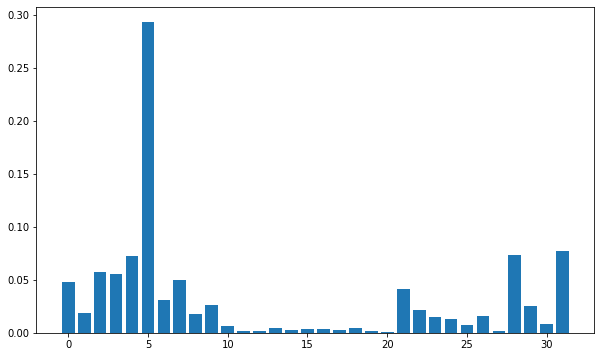

In [100]:
importance = rf.feature_importances_
for i , v in enumerate(importance) :
    print("Feature : %0d, Score : %0.5f" %(i,v))
    
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [101]:
X_train.shape

(51059, 32)

In [102]:
X_train.columns

Index(['age', 'salary', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'pdays_no_contact', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

In [103]:
# Important columns we get through Logistic Regression
cols

Index(['age', 'duration', 'campaign', 'pdays', 'pdays_no_contact',
       'job_blue-collar', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'housing_yes', 'loan_yes', 'contact_unknown'],
      dtype='object')

In [104]:
# Important columns we get through RandomForest Classifier

rf_cols = ["months", "contact_unknown", "duration", "housing_yes", "balance", "day", "age", "pdays", "marital_married", 
               "campaign", "pdays_no_contact", "previous","marital_single", "education_secondary", "loan_yes"]
rf_cols

['months',
 'contact_unknown',
 'duration',
 'housing_yes',
 'balance',
 'day',
 'age',
 'pdays',
 'marital_married',
 'campaign',
 'pdays_no_contact',
 'previous',
 'marital_single',
 'education_secondary',
 'loan_yes']

## Which model is better ??

### Random Forest Classifier has better perform on select features because accuracy score given by it is 93% whereas accuracy by Logistic Regression is 87%

## Feature Importance

### Important feature from RandomForest Classifier and Logistic Regression out of 15 11 features match 